- Name of activity: Exercise: Aggregates
- Your name: Dima Mikhaylov
- Your UVA computing ID: agp7dp

# Exercise: Aggregates
Directions: Complete all three parts of the assignment.

## 1. Write a summary about each aggregate function mentioned (np.mean, np.std, np.var, np.argmin, np.argmax, np.median, np.percentile).


* `mean()` returns the arithmetic mean along the specified axis.
    * Optional `out` can be used to specify alternative output array.
    * Optional `keepdims` cab be used for broadcasting against the original array.

* `std()` returns the standard deviation along the specified axis.
    * In addition to similar use of `out` and `keepdims` , it also supports `ddof` that stands fpr degrees of freedom, zero by default.
    
* `var()` return the variance along the specified axis.
    * Similarly to `std()`, this function supports `out`, `keepdims`, and `ddof`.

* `argmin()` returns the index of the first occurrence of the **mimimum** value along the specified axis of an array. 
    * Optional parameter `out` can be used to insert the result into the array.

* `argmax()` returns the index of the first occurrence of the **maximum** value along the specified axis of an array. 
    * Optional parameter `out` can be used to insert the result into the array.

* `median()` returns the **median** of an array along the specified axis. 
    * Optional `out` can be used to specify alternative output array. 
    * Moreover, `overwrite_input` can be specified to allow use of memory of the input array and `keepdims` cab be used for broadcasting against the original array.

* `percentile()` returns the **q-th percentiles** of the array elements along the specified axis. 
    * In addition to similar use of `out`, `overwrite_input` and `keepdims` , it also supports optional `interpolation` for cases when the selected percentile falls between two data points.

## 2. Come up with a small sample of code (with appropriate setup/data) that illustrates the usage of at least four (4) of the aggregate functions (from Part 1). Include the results/output as well.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#### First, generating random data points:

In [ ]:
input_array, output_array = make_blobs(n_samples=30, centers=2, n_features=1, random_state=123)

#### 1. Using and testing Numpy `mean()`

In [2]:
np.round(np.mean(input_array), 3)

-0.228

In [120]:
mean = np.round(np.sum(input_array)/len(input_array), 3)
mean

-0.228

#### 2. Using and testing Numpy `var()`

In [121]:
np.round(np.var(input_array), 3)

18.177

In [122]:
var = np.round(float(sum([(x - mean) ** 2 for x in input_array])/len(input_array)), 3)
var

18.177

#### 3. Using and testing Numpy `std()`

In [123]:
np.round(np.std(input_array), 3)

4.263

In [124]:
np.round(var ** (1/2), 3)

4.263

#### 4. Using and testing Numpy `argmin()`

In [125]:
input_array[np.argmin(input_array)]

array([-7.07580241])

In [126]:
sorted(input_array)[0]

array([-7.07580241])

## 3. Find a sample data set (or create a reasonable data set and place in an appropriate structure, e.g., DataFrame or other). Using GroupBy and splitting using more than one key, perform some queries against that data. Explain what question you’re trying to answer and show the results/output. Come up with a total of three (3) different queries.

#### Loading and inspecting the dataset. The dataset was retrieved on 10/22/2021 using download functionality. It contains information about recently (last 20 years) failed banks, i.e. name of the bank and IDs, date of restructuring and costs, as well as location of headquarters and size of assets and deposits. Source: https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/

In [127]:
df = pd.read_csv("failed_banks_cleaned.csv", index_col=0)
df.head(2)

,CERT,COST,NAME,QBFASSET,QBFDEP,RESTYPE,CITY,STATE,YEAR_FAILED,MONTH_FAILED,QUARTER_FAILED,BANK_TYPE,BANK_CLASS
0,21111,2491.0,CITY NATIONAL BANK OF NEW JERSEY,120574,111234,FAILURE,NEWARK,NJ,2019,11,2019Q4,Commercial,National FRS Banks
1,58112,4547.0,LOUISA COMMUNITY BANK,28163,25174,FAILURE,LOUISA,KY,2019,10,2019Q4,Commercial,State Chartered non-FRS Banks


#### Checking observations counts and data types

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CERT            577 non-null    int64  
 1   COST            577 non-null    float64
 2   NAME            577 non-null    object 
 3   QBFASSET        577 non-null    int64  
 4   QBFDEP          577 non-null    int64  
 5   RESTYPE         577 non-null    object 
 6   CITY            577 non-null    object 
 7   STATE           577 non-null    object 
 8   YEAR_FAILED     577 non-null    int64  
 9   MONTH_FAILED    577 non-null    int64  
 10  QUARTER_FAILED  577 non-null    object 
 11  BANK_TYPE       577 non-null    object 
 12  BANK_CLASS      577 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 63.1+ KB


#### Using grouped to inspect the data types of the DataFrame

In [129]:
grouped = df.groupby(df.dtypes, axis=1)
for dtype, group in grouped:
    print(dtype)
    print(group)

int64
      CERT  QBFASSET  QBFDEP  YEAR_FAILED  MONTH_FAILED
0    21111    120574  111234         2019            11
1    58112     28163   25174         2019            10
2    58317     23292   22885         2019            10
3    10716     36738   31254         2019             5
4    30570    166345  143964         2017            12
..     ...       ...     ...          ...           ...
572    338     85485   77140         2000             9
573  10985     25942   26667         2000             7
574  25056      7923    7680         2000             6
575  27886     31479   32234         2000             3
576  14228    105044   68549         2000             1

[577 rows x 5 columns]
float64
        COST
0     2491.0
1     4547.0
2     2188.0
3    21577.0
4    86826.0
..       ...
572  14592.0
573   1363.0
574    617.0
575   1322.0
576  11574.0

[577 rows x 1 columns]
object
                                       NAME  RESTYPE        CITY STATE  \
0          CITY NATIONAL BANK

#### Using describe() on the grouped DataFrame:

In [130]:
grouped.describe()

count         mean          std   min    25%     50%  \
int64   CERT             577      31539.9      16458.9    91  20115   32102   
        QBFASSET         577   6.8178e+06  8.06444e+07  3785  90867  203955   
        QBFDEP           577  3.27468e+06  4.17251e+07   500  78549  182794   
        YEAR_FAILED      577      2010.08      2.70244  2000   2009    2010   
        MONTH_FAILED     577      6.29809      3.39851     1      3       7   
float64 COST             577       127153       580811     0  13697   36819   
object  NAME             577          NaN          NaN   NaN    NaN     NaN   
        RESTYPE          577          NaN          NaN   NaN    NaN     NaN   
        CITY             577          NaN          NaN   NaN    NaN     NaN   
        STATE            577          NaN          NaN   NaN    NaN     NaN   
        QUARTER_FAILED   577          NaN          NaN   NaN    NaN     NaN   
        BANK_TYPE        577          NaN          NaN   NaN    NaN     NaN   
        BANK_CLASS       577          NaN          NaN   NaN    NaN     NaN   

                           75%          max unique  \
int64   CERT             35356        58701    NaN   
        QBFASSET        504816  1.47163e+09    NaN   
        QBFDEP          443481  9.54678e+08    NaN   
        YEAR_FAILED       2011         2019    NaN   
        MONTH_FAILED         9           12    NaN   
float64 COST             89121  1.20722e+07    NaN   
object  NAME               NaN          NaN    559   
        RESTYPE            NaN          NaN      2   
        CITY               NaN          NaN    441   
        STATE              NaN          NaN     46   
        QUARTER_FAILED     NaN          NaN     59   
        BANK_TYPE          NaN          NaN      2   
        BANK_CLASS         NaN          NaN      6   

                                                   top freq  
int64   CERT                                       NaN  NaN  
        QBFASSET                                   NaN  NaN  
        QBFDEP                                     NaN  NaN  
        YEAR_FAILED                                NaN  NaN  
        MONTH_FAILED                               NaN  NaN  
float64 COST                                       NaN  NaN  
object  NAME                          FIRST STATE BANK    3  
        RESTYPE                                FAILURE  564  
        CITY                                   CHICAGO   20  
        STATE                                       GA   94  
        QUARTER_FAILED                          2009Q3   50  
        BANK_TYPE                           Commercial  489  
        BANK_CLASS       State Chartered non-FRS Banks  336

#### Query 1: grouping counts of Names of failed banks by their respective State and City

In [136]:
grouped = df.groupby(['STATE', 'CITY'])['NAME'].count()
grouped

STATE  CITY        
 AL    BIRMINGHAM      3
       FORT DEPOSIT    1
       IRONDALE        1
       MONTGOMERY      1
       SYLACAUGA       1
                      ..
 WI    STOUGHTON       1
       WAUSAU          1
       WEST ALLIS      1
 WV    NORTHFORK       1
 WY    THERMOPOLIS     1
Name: NAME, Length: 451, dtype: int64

#### Similar results can be visualized when grouping by `STATE` only and taking count of `NAME`

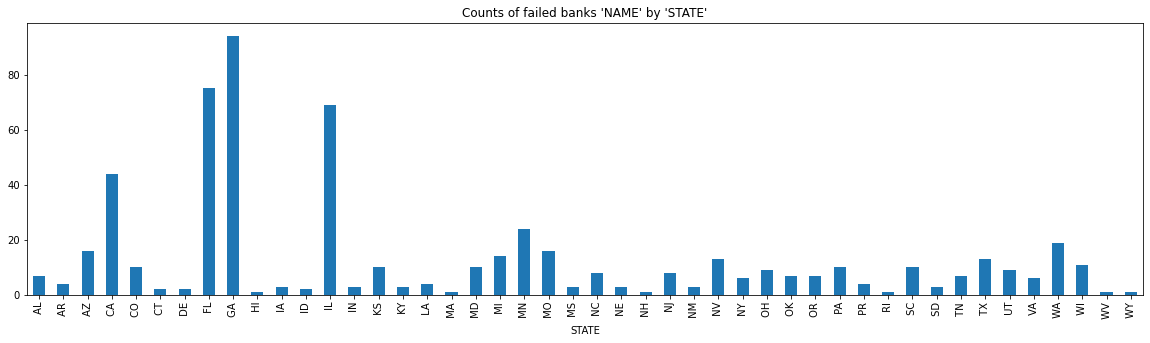

In [137]:
df.groupby(['STATE'])['NAME'].count().plot(kind='bar', 
                                           figsize=(20, 5),
                                           title="Counts of failed banks 'NAME' by 'STATE'")
plt.show()

#### Query 2: grouping sums of `COST` of failed banks by Year and Quarter of failure:

In [140]:
df.groupby(['YEAR_FAILED', 'QUARTER_FAILED'])['COST'].sum()

YEAR_FAILED  QUARTER_FAILED
2000         2000Q1               12896.00
             2000Q2                 617.00
             2000Q3               15955.00
             2000Q4                3070.00
2001         2001Q1                 817.00
             2001Q2                 769.00
             2001Q3              290879.00
2002         2002Q1              346966.61
             2002Q2               54058.00
             2002Q3                1326.00
             2002Q4               21521.00
2003         2003Q1               49179.00
             2003Q2               12788.00
             2003Q4                 679.00
2004         2004Q1                 919.00
             2004Q2                2998.00
2007         2007Q1                9438.00
             2007Q3              120702.00
             2007Q4               28394.00
2008         2008Q1               11046.00
             2008Q2             1037273.00
             2008Q3            14543164.00
             2008Q4       

#### Alternatively, this can be visualized simply by grouping by the `'YEAR_FAILED'` only:

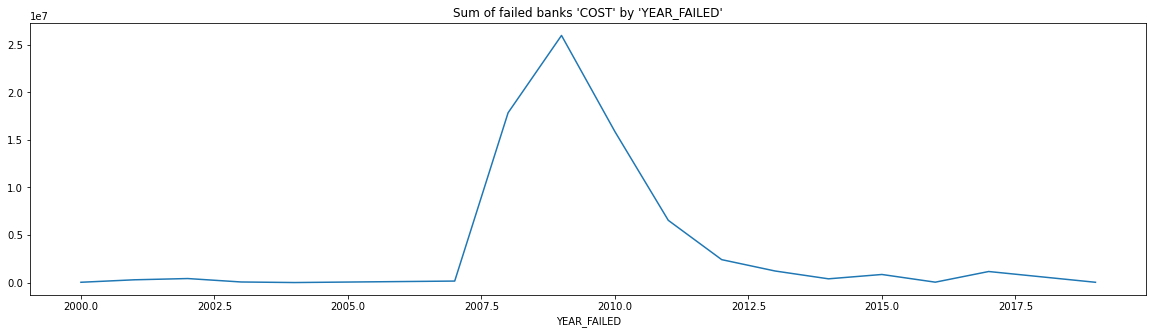

In [141]:
df.groupby(['YEAR_FAILED'])['COST'].sum().plot(kind='line',
                                               figsize=(20, 5),
                                               title="Sum of failed banks 'COST' by 'YEAR_FAILED'")
                                              
plt.show()

#### Query 3: grouping sums of `'COST'` of assistance v failure for different bank types and classes

In [145]:
# Group sum of Costs of restructuring for different bank types:
df.groupby(['RESTYPE', 'BANK_TYPE', 'BANK_CLASS'])['COST'].sum()

RESTYPE     BANK_TYPE   BANK_CLASS                        
ASSISTANCE  Commercial   National FRS Banks                          0.00
                         State Chartered non-FRS Banks               0.00
            Savings      Federal Savings Bank                        0.00
FAILURE     Commercial   National FRS Banks                    6768859.61
                         State Chartered FRS Banks             5918281.00
                         State Chartered non-FRS Banks        34959377.00
            Savings      Federal & State Savings and Loans    12480114.00
                         Federal Savings Bank                 11857724.00
                         State Savings FDIC Banks              1383011.00
Name: COST, dtype: float64

#### Alternatively, similar grouping can be using to show `ASSETS` and `DEPOSITS` of different types and classes of failed banks like so, for example:

<ipython-input-155-3e54240f33ad>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['BANK_TYPE', 'BANK_CLASS'])['QBFASSET','QBFDEP' ].sum().plot(kind='barh',


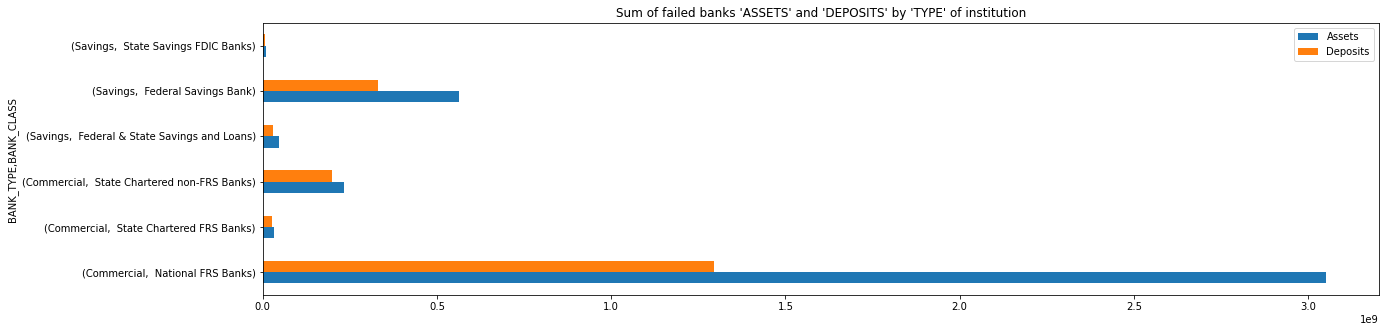

In [155]:
fig, ax = plt.subplots()
title = "Sum of failed banks 'ASSETS' and 'DEPOSITS' by 'TYPE' of institution"
df.groupby(['BANK_TYPE', 'BANK_CLASS'])['QBFASSET','QBFDEP' ].sum().plot(kind='barh',
                                                          figsize=(20, 5),
                                                          title=title, ax=ax)
ax.legend({"Assets":"QBFASSET", "Deposits":"QBFDEP"})
                                                         
                                                         
plt.show()

## Submission Instructions
Submit your .ipynb file and its pdf output. 